In [4]:
import pandas as pd
data = pd.read_csv("titanic.csv")
print("___________İLK 10 SATIR:___________\n",data.head(10))


___________İLK 10 SATIR:___________
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                          

In [6]:
print("\nEksik veri var mı?:")
print(data.isnull().values.any())


Eksik veri var mı?:
True


In [19]:
print("\nHangi değişkenlerde kaçtane eksik veri var?:")
print(data.isnull().sum())



Hangi değişkenlerde kaçtane eksik veri var?:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:

data = data.copy()
#age ,cabin ve embared verilerinde eksik var
data['Age'].fillna(data['Age'].mean())
print("\nEksik yaş verileri dolduruldu.")

#Embarked sütunu yolcuların gemiye bindiği limanları temsil ediyormuş bu nedenle mod ile doldurmak mantıklı olur.
data['Embarked'].fillna(data['Embarked'].mode()[0])
print("\nEksik Embarked verileri dolduruldu.")

#Cabin sütunu, gemideki yolcuların kaldığı kabin numarasını temsil eder
# Çok fazla eksik değeri bulunduğu için unknown ile doldurularak analizi bozmamaya çalışacağım.
data['Cabin'].fillna('Unknown')
print("\nEksik Cabin verileri dolduruldu.")



Eksik yaş verileri dolduruldu.

Eksik Embarked verileri dolduruldu.

Eksik Cabin verileri dolduruldu.


In [25]:
# Kadın erkek sayıları
print("Kadın erkek sayıları: \n")
print(data['Sex'].value_counts())

Kadın erkek sayıları: 

Sex
male      577
female    314
Name: count, dtype: int64


In [41]:
 oran=data['Survived'].mean()*100
print(f"Hayatta kalma oranı: {oran:.4f}%")

Hayatta kalma oranı: 38.3838%


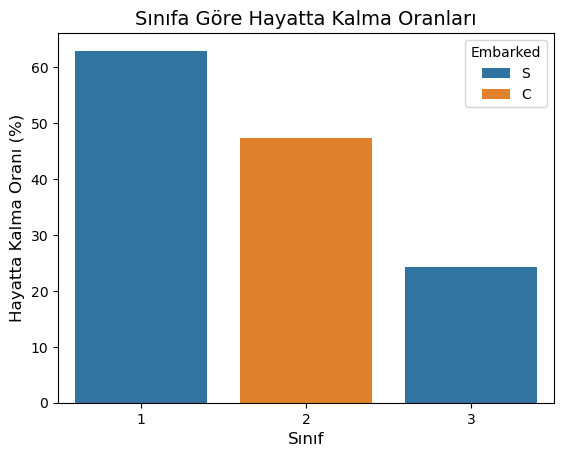

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

#pclass sınıfında olanların hayatta kalma oranlarını hesaplayalım
oran2 =data.groupby('Pclass')['Survived'].mean()*100

#reset_index() kullanarak Series nesnesini bir DataFrame'e dönüştürüyoruz seaborn kütüphanesi okuyabilsin
oran2_df=oran2.reset_index()
oran2_df.columns=['Pclass','Survived Rate']

oran2_df['Embarked'] = data['Embarked']# oran2_df de embarked olmadığı için eklemeliyiz yoksa hue ekleyemeyiz

sns.barplot(x='Pclass',y='Survived Rate', data=oran2_df,hue='Embarked')
plt.title('Sınıfa Göre Hayatta Kalma Oranları', fontsize=14)
plt.xlabel('Sınıf', fontsize=12)
plt.ylabel('Hayatta Kalma Oranı (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
